In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

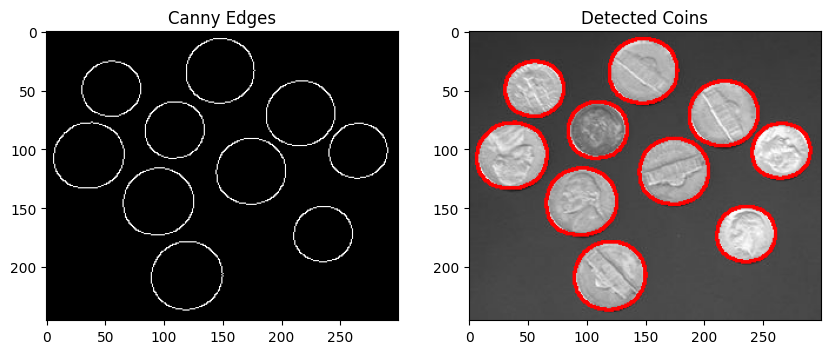

In [22]:
#Detect all coins in the image (2 Marks)
#   Use edge detection, to detect all coins in the image.
#   Visualize the detected coins by outlining them in the image.

blurred = cv2.GaussianBlur(gray, (11, 11), 0)
edges = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()
cv2.drawContours(output, contours, -1, (0, 0, 255), 2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Canny Edges")
plt.imshow(edges, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Detected Coins")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
#Function to dispay an image
from IPython.display import Image, display
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

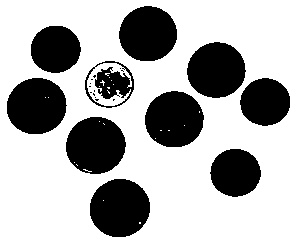

In [7]:
#blurred = cv2.GaussianBlur(gray, (7, 7), 0)
#ret, bin_img = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#imshow(bin_img)

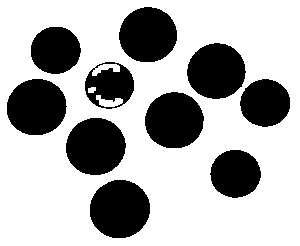

In [19]:
ret, thresh = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 4))
thresh = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,kernel,iterations=1)
imshow(thresh)

Number of coins is  10


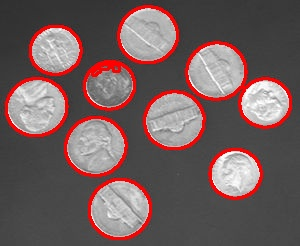

In [20]:
#Count the Total Number of Coins (2 Marks)
#   Write a function to count the total number of coins detected in the image.
#   Display the final count as an output.

contours , _ = cv2.findContours(thresh , cv2.RETR_TREE , cv2.CHAIN_APPROX_NONE)
area = {}
for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar
srt = sorted(area.items() , key = lambda x : x[1] , reverse = True)
results = np.array(srt).astype("int")
num = np.argwhere(results[: , 1] > 500).shape[0]

for i in range(1 , num):
    image = cv2.drawContours(image , contours , results[i , 0] ,
                                  (0 , 0 , 255) , 2)
print("Number of coins is " , num - 1)
imshow(image)    